In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
import mysql.connector

In [2]:
# Connect to MySQL database
cnx = pymysql.connect(
    user='root', 
    password='78203393',
    host='localhost',
    database='global_freelance'
)
# Read data from SQL table
df_raw = pd.read_sql("SELECT * FROM clean_freelancers", con=cnx)
cnx.close()

C:\Users\FITRAH\AppData\Local\Temp\ipykernel_21856\3928053446.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_raw = pd.read_sql("SELECT * FROM clean_freelancers", con=cnx)


In [3]:

df_preprocess= df_raw.copy()

In [4]:
# Display Shape of dataframe
df_raw.shape

(1000, 12)

In [5]:
#Display Information
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   freelancer_id        1000 non-null   object 
 1   name                 1000 non-null   object 
 2   gender               1000 non-null   object 
 3   age                  970 non-null    float64
 4   country              1000 non-null   object 
 5   language             1000 non-null   object 
 6   primary_skill        1000 non-null   object 
 7   years_of_experience  949 non-null    float64
 8   hourly_rate          906 non-null    float64
 9   rating               899 non-null    float64
 10  is_active            911 non-null    float64
 11  client_satisfaction  824 non-null    float64
dtypes: float64(6), object(6)
memory usage: 93.9+ KB


## Understand Data Structure (Initial EDA)
### General Overview

In [6]:
# Display top 5 Data of dataframe

df_preprocess.head()

,freelancer_id,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate,rating,is_active,client_satisfaction
0,FL250001,Ms. Nicole Kidd,Female,52.0,Italy,Italian,Blockchain Development,11.0,100.0,NaN,0.0,NaN
1,FL250002,Vanessa Garcia,Female,52.0,Australia,English,Mobile Apps,34.0,100.0,3.3,1.0,84.0
2,FL250003,Juan Nelson,Male,53.0,Germany,German,Graphic Design,31.0,50.0,0.0,0.0,71.0
3,FL250004,Amanda Spencer,Female,38.0,Australia,English,Web Development,4.0,40.0,1.5,0.0,90.0
4,FL250005,Lynn Curtis DDS,Female,53.0,Germany,German,Web Development,27.0,30.0,4.8,0.0,83.0


In [7]:
# display the last 5 of dataframe
df_preprocess.tail()

,freelancer_id,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate,rating,is_active,client_satisfaction
995,FL250996,Albert Wilcox,Male,56.0,Turkey,Turkish,DevOps,13.0,100.0,0.0,0.0,68.0
996,FL250997,Cheryl Norris,Female,26.0,Germany,German,Blockchain Development,6.0,40.0,2.8,0.0,82.0
997,FL250998,Kathy Watkins,Female,37.0,Japan,Japanese,Data Analysis,15.0,75.0,NaN,0.0,94.0
998,FL250999,John Obrien,Male,46.0,Russia,Russian,Machine Learning,22.0,100.0,2.8,1.0,97.0
999,FL251000,Dawn Green,Female,36.0,Mexico,Spanish,UI/UX Design,18.0,20.0,1.7,1.0,72.0


In [8]:
#display the tipe of datas
df_preprocess.dtypes

freelancer_id           object
name                    object
gender                  object
age                    float64
country                 object
language                object
primary_skill           object
years_of_experience    float64
hourly_rate            float64
rating                 float64
is_active              float64
client_satisfaction    float64
dtype: object

In [9]:
#display missing values
df_preprocess.isnull().sum()

freelancer_id            0
name                     0
gender                   0
age                     30
country                  0
language                 0
primary_skill            0
years_of_experience     51
hourly_rate             94
rating                 101
is_active               89
client_satisfaction    176
dtype: int64

In [10]:
#display percentage of missing values
df_raw.isnull().sum() / len(df_raw) * 100

freelancer_id           0.0
name                    0.0
gender                  0.0
age                     3.0
country                 0.0
language                0.0
primary_skill           0.0
years_of_experience     5.1
hourly_rate             9.4
rating                 10.1
is_active               8.9
client_satisfaction    17.6
dtype: float64

In [11]:
# display unique data
df_raw.nunique()

freelancer_id          1000
name                    992
gender                    2
age                      41
country                  21
language                 16
primary_skill            10
years_of_experience      41
hourly_rate               6
rating                   42
is_active                 2
client_satisfaction      41
dtype: int64

### Visualisasi Awal

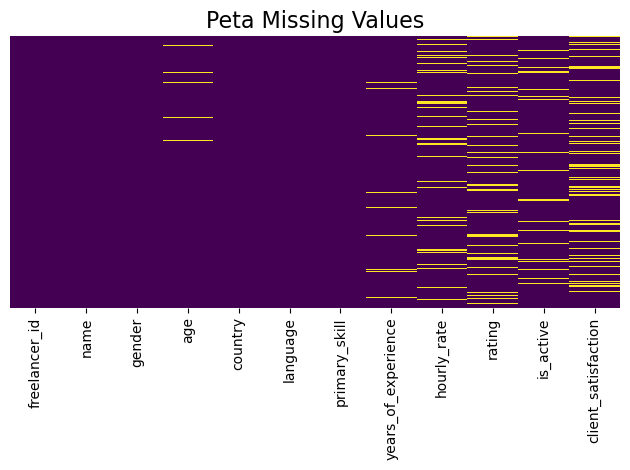

In [12]:
##Visualisasi Missing Values
# This will create a heatmap to visualize the missing values in the DataFrame

sns.heatmap(df_preprocess.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Peta Missing Values', fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
# Display numeric and catagorical columns

numeric_cols = df_preprocess.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_preprocess.select_dtypes(include=['object']).columns.tolist()

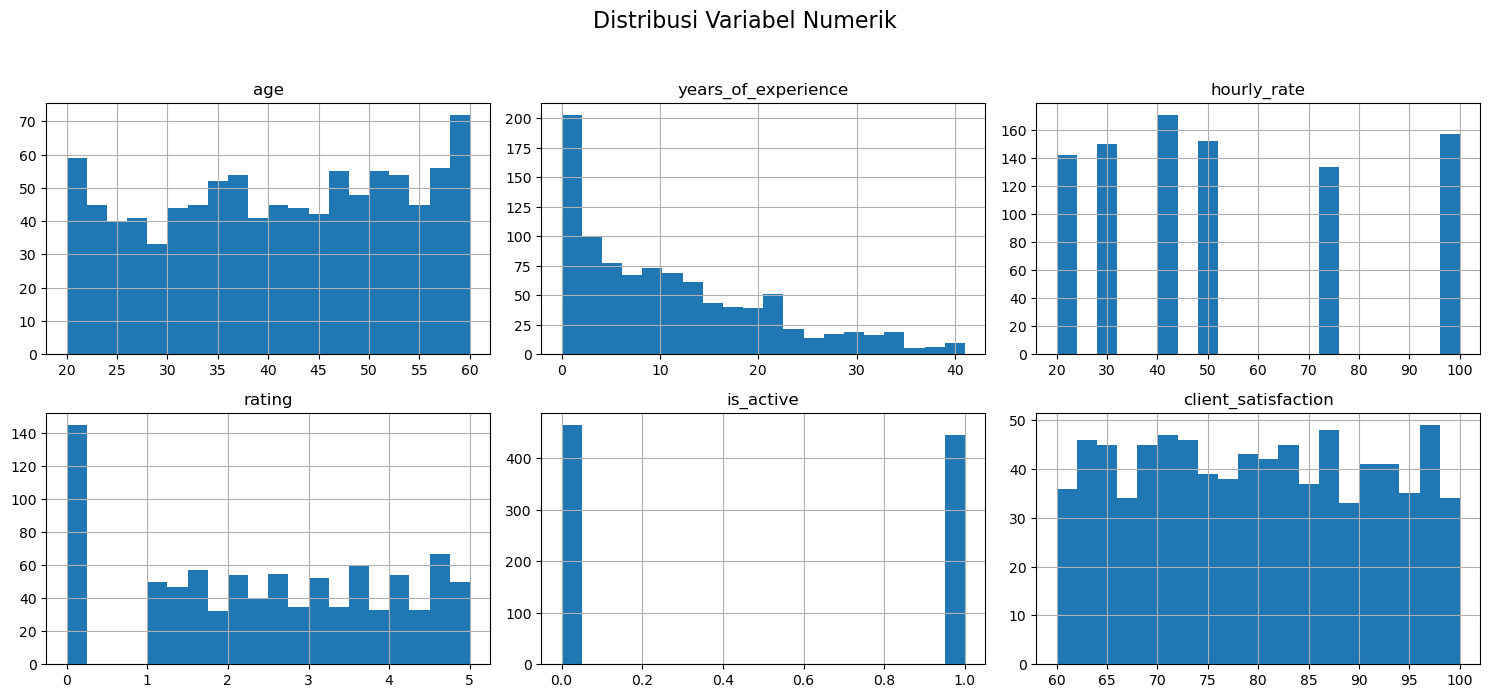

In [14]:
# Visualisasi Distribusi Variabel Numerik
# This will create histograms for each numeric column to visualize their distributions

df_preprocess[numeric_cols].hist(bins=20, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribusi Variabel Numerik', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for the title
plt.show()

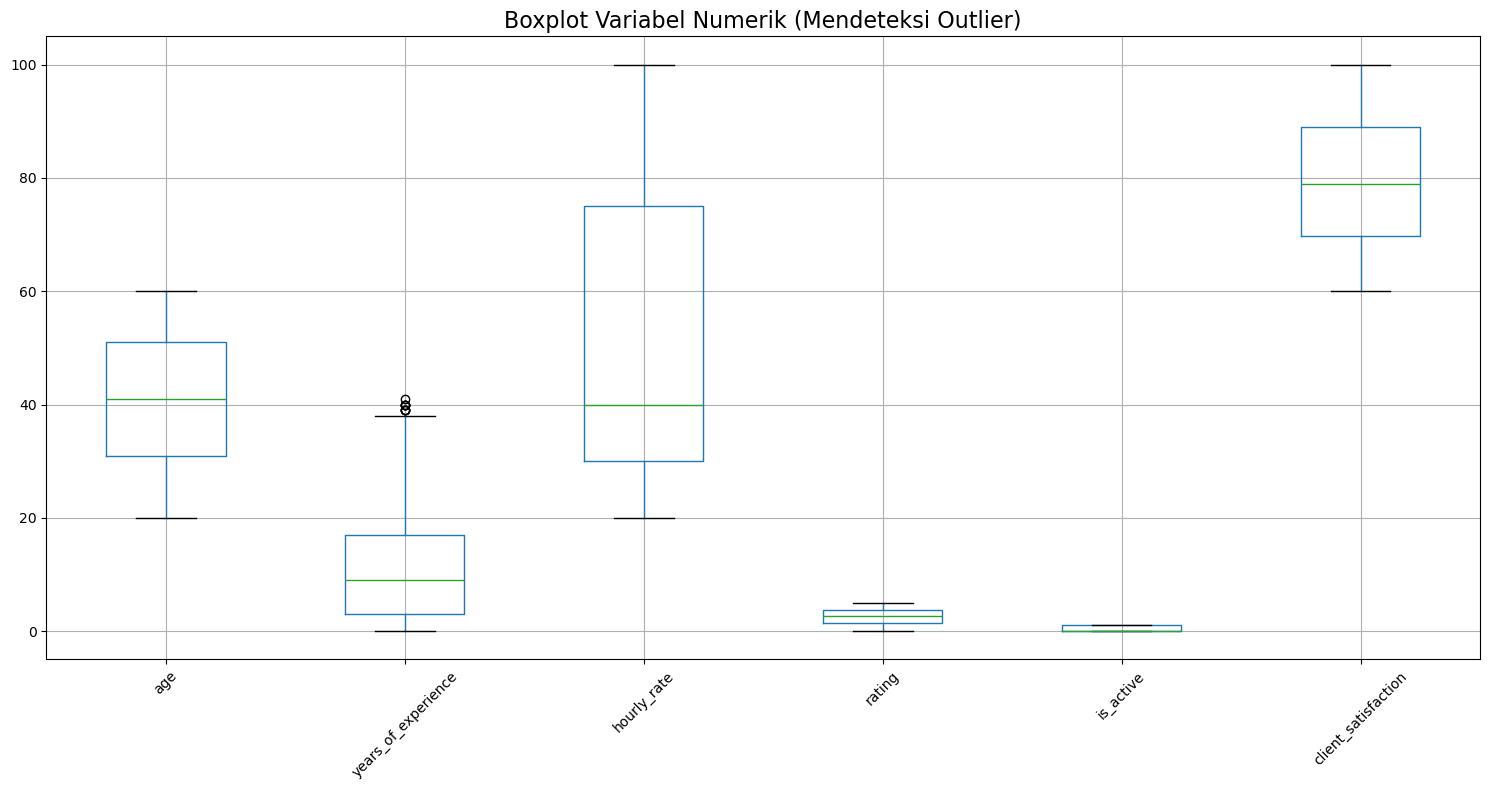

In [15]:
# visualisasi boxplot for Outlier detection

plt.figure(figsize=(15, 8))
df_preprocess[numeric_cols].boxplot()
plt.title('Boxplot Variabel Numerik (Mendeteksi Outlier)', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

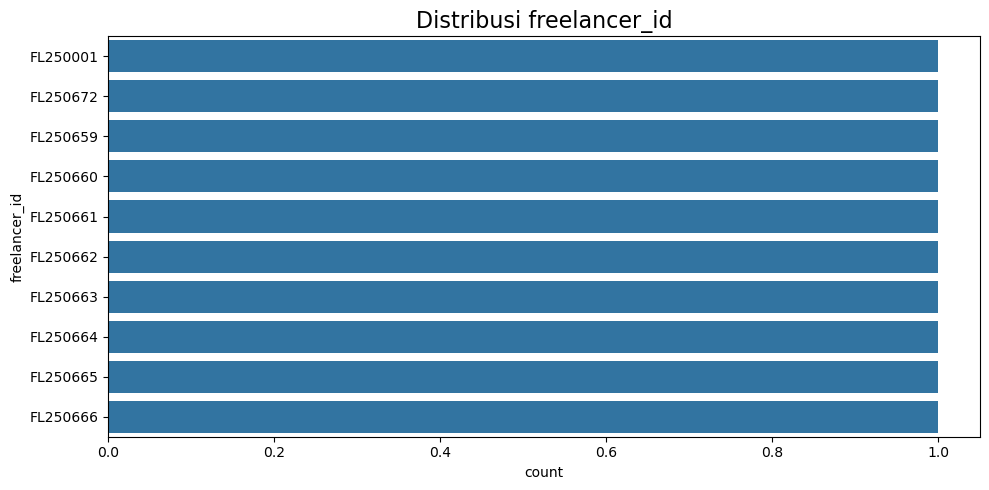

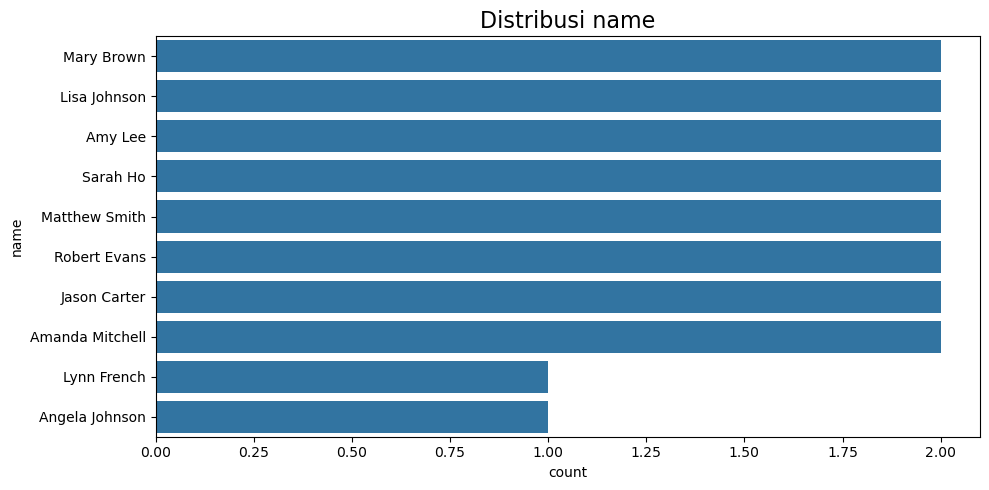

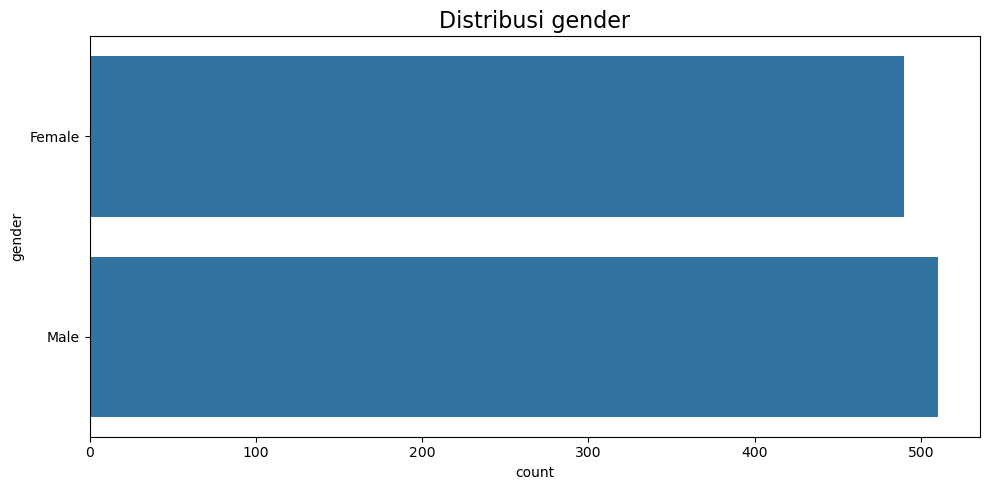

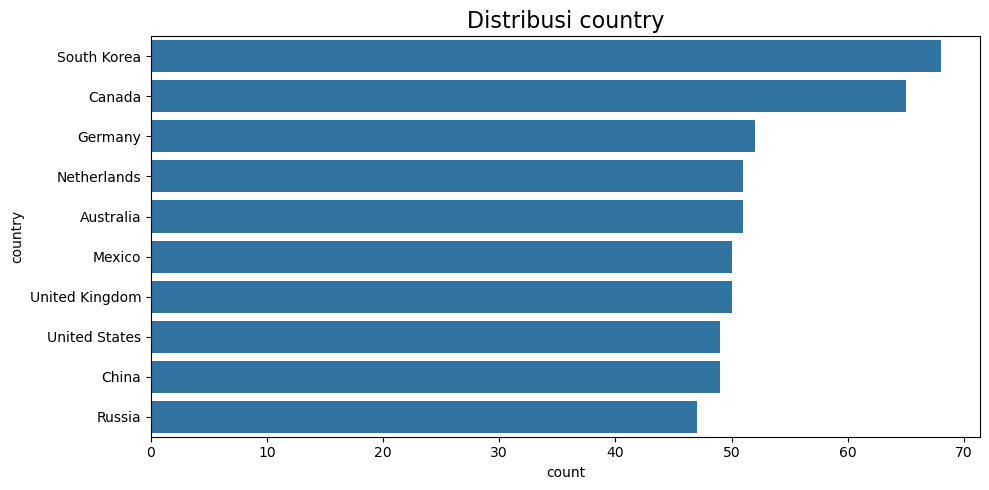

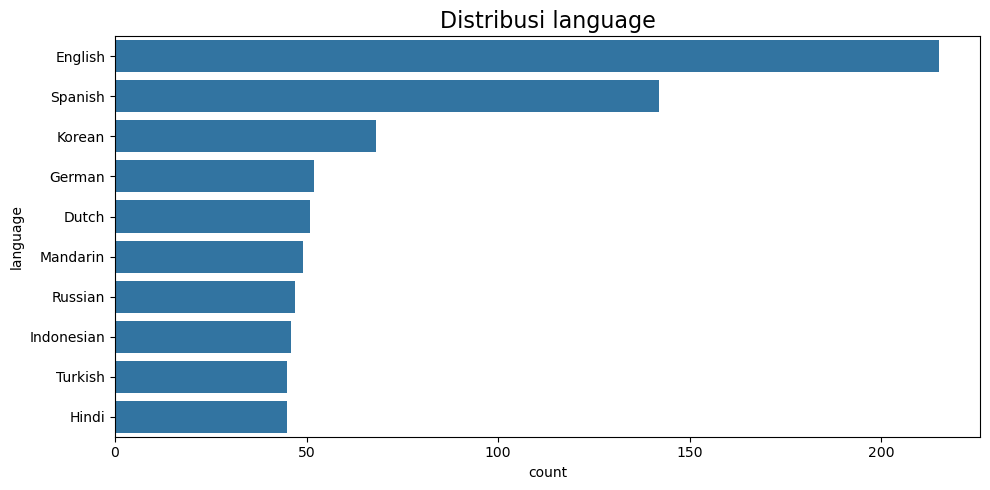

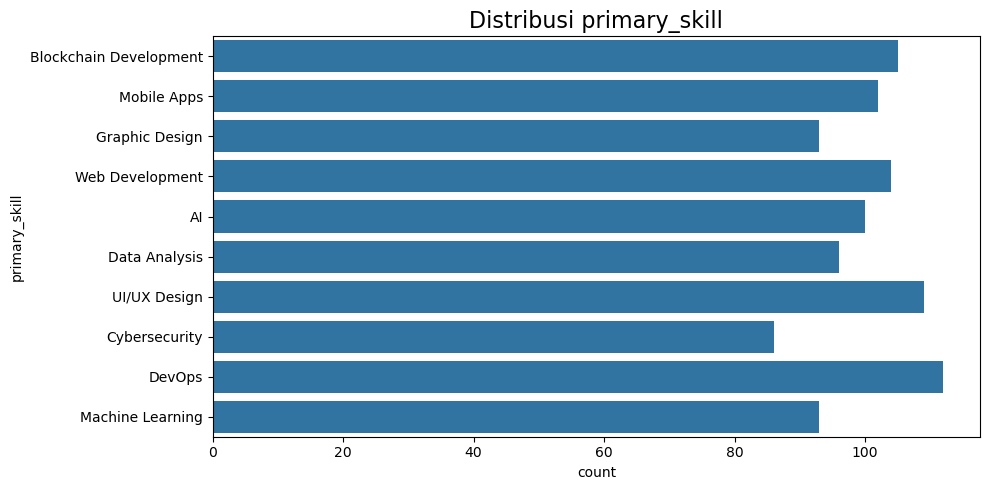

In [16]:
# Visualisasi Distribusi Kategori
# This will create count plots for each categorical column to visualize their distributions

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    if df_preprocess[col].nunique() > 10:
        top_categories = df_preprocess[col].value_counts().nlargest(10).index
        filtered_df = df_preprocess[df_preprocess[col].isin(top_categories)]
        sns.countplot(y=col, data=filtered_df, order=top_categories)
    else:
        sns.countplot(y=col, data=df_preprocess)
    
    plt.title(f'Distribusi {col}', fontsize=16)
    plt.tight_layout()
    plt.show()

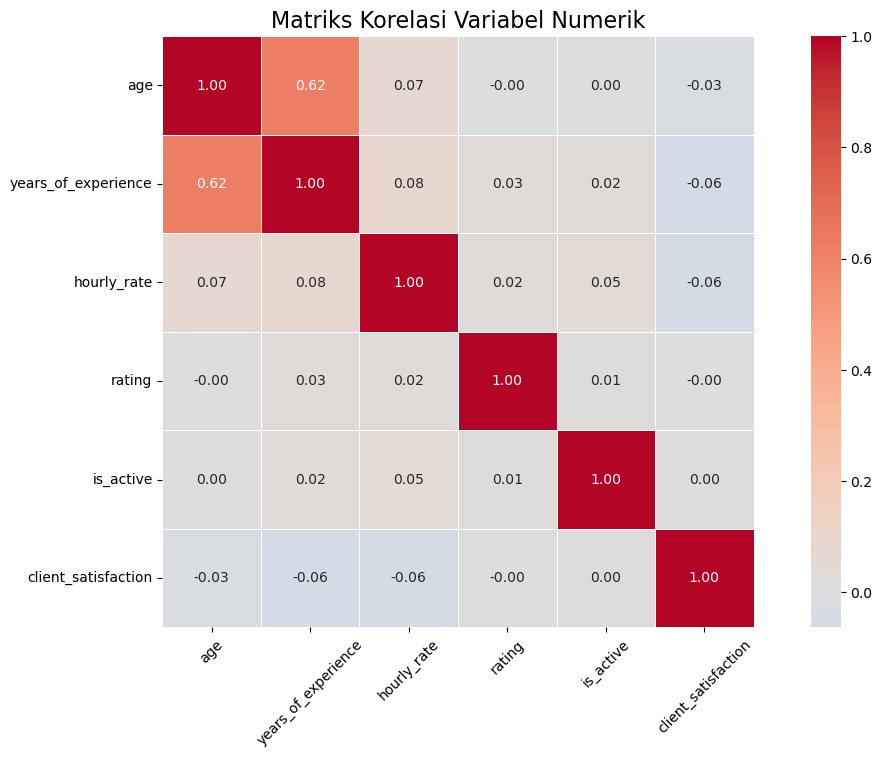

In [17]:
# display correlation matrix with Heatmap

plt.figure(figsize=(12, 8))
correlation_matrix = df_preprocess[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Variabel Numerik', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# display statistical summary of the DataFrame
df_preprocess.describe()

,age,years_of_experience,hourly_rate,rating,is_active,client_satisfaction
count,970.000000,949.000000,906.000000,899.000000,911.000000,824.000000
mean,40.509278,11.340358,52.461369,2.512570,0.489572,79.269417
std,11.942605,9.680610,27.323742,1.546599,0.500166,11.495162
min,20.000000,0.000000,20.000000,0.000000,0.000000,60.000000
25%,31.000000,3.000000,30.000000,1.400000,0.000000,69.750000
50%,41.000000,9.000000,40.000000,2.600000,0.000000,79.000000
75%,51.000000,17.000000,75.000000,3.800000,1.000000,89.000000
max,60.000000,41.000000,100.000000,5.000000,1.000000,100.000000


## Data Preparation

### Data Cleaning
#### Handling Missing values

In [ ]:
# Handle missing values with median

df_preprocess[numeric_cols] = df_preprocess[numeric_cols].fillna(df_preprocess[numeric_cols].median())

In [ ]:
# Change the type of Is_active column to boolean
df_preprocess['is_active'] = df_preprocess['is_active'].astype('boolean')

In [ ]:
# Function to handle boolean with mode

def handle_boolean_missing(df, column_name):
    # Convert to nullable boolean type first
    df[column_name] = df[column_name].astype('boolean')
    
    # Calculate mode on non-null values
    non_null_values = df[column_name].dropna()
    if len(non_null_values) > 0:
        mode_val = non_null_values.mode().iloc[0]
    else:
        mode_val = False
    
    # Fill missing values
    df[column_name] = df[column_name].fillna(mode_val)
    
    return df

In [ ]:
# Handle missing value of is active
df_preprocess = handle_boolean_missing(df_preprocess, 'is_active')

In [24]:
df_outliers = df_preprocess.copy()

In [ ]:
# Function to mark outliers as NaN
# This function calculates the Interquartile Range (IQR) and mark outliers as NaN

def mark_outliers_as_nan(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #Create mask for outliers
    outlier_mask = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
    

    #Return the modified DataFrame
    return df.assign(**{column_name: np.where(outlier_mask, np.nan, df[column_name])})

In [ ]:
# Display numbers of missing value after mark outlier with NaN

original_missing_count = df_outliers['years_of_experience'].isnull().sum()

df_outliers=mark_outliers_as_nan(df_outliers, 'years_of_experience')

print("Jumlah missing values baru:", df_outliers['years_of_experience'].isnull().sum())

new_missing_count = df_outliers['years_of_experience'].isnull().sum()

print("Outlier yang ditandai sebagai NaN:", new_missing_count - original_missing_count)

Jumlah missing values baru: 9
Outlier yang ditandai sebagai NaN: 9


In [ ]:
# Check missing value after handle oulier
df_outliers.isnull().sum()

freelancer_id          0
name                   0
gender                 0
age                    0
country                0
language               0
primary_skill          0
years_of_experience    9
hourly_rate            0
rating                 0
is_active              0
client_satisfaction    0
dtype: int64

In [28]:
df_anom=df_outliers.copy()

In [ ]:
# Function to detect anomal
# This function calculates the Interquartile Range (IQR)

def anomaly_detection_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return (df[column_name] <= lower_bound) | (df[column_name] >= upper_bound)

In [ ]:
# Detect anomalies in 'years_of_experience' column using IQR method
# You can choose to use either the IQR method or the Z-score method by uncommenting the desired lines
# Here, we are using the IQR method to detect anomalies in the 'years_of_experience' column

df_anom['anom']=anomaly_detection_iqr(df_anom, 'years_of_experience')
df_anom['anom'].value_counts()

anom
False    994
True       6
Name: count, dtype: int64

In [31]:
df_mv=df_anom.copy()

In [ ]:
# Handle missing value from oulier with median

df_mv['years_of_experience'] = df_mv['years_of_experience'].fillna(
    df_mv['years_of_experience'].median()
)

In [ ]:
#display years of experience that less than 35 years
df_mv[df_mv['years_of_experience']>35].head(10)

,freelancer_id,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate,rating,is_active,client_satisfaction,anom
69,FL250070,Gina Thompson,Female,60.0,China,Mandarin,UI/UX Design,38.0,20.0,2.0,False,71.0,True
595,FL250596,Rachel Smith,Female,56.0,Italy,Italian,Mobile Apps,37.0,40.0,0.0,False,70.0,True
621,FL250622,Samuel Patterson,Male,57.0,Mexico,Spanish,Machine Learning,37.0,30.0,4.8,False,79.0,True
656,FL250657,Wendy Rice,Female,59.0,France,French,Cybersecurity,37.0,30.0,4.0,False,62.0,True
742,FL250743,Eric Nguyen,Male,55.0,India,Hindi,AI,37.0,75.0,4.1,False,79.0,True
991,FL250992,Charlotte Taylor,Female,58.0,Germany,German,UI/UX Design,37.0,50.0,4.9,False,69.0,True


## EDA

Filter dataset untuk hanya menyertakan freelancer dengan:

primary_skill = "Data Analysis"

years_of_experience <= 3 (kriteria entry-level)

In [37]:
df_eda=df_mv.copy()

In [ ]:
# Create filter where primary skill = Data Analysis and have less than 3 years experience

freelancer= df_eda[(df_eda['primary_skill']== 'Data Analysis') & (df_eda['years_of_experience']<=3)]
freelancer.shape

(27, 13)

In [93]:
freelancer.describe()

,age,years_of_experience,hourly_rate,rating,client_satisfaction
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,30.111111,1.259259,48.888889,2.044444,76.851852
std,12.245355,0.984206,25.732848,1.459803,10.090756
min,20.000000,0.000000,20.000000,0.000000,60.000000
25%,21.000000,0.000000,30.000000,1.150000,70.000000
50%,23.000000,1.000000,40.000000,2.100000,77.000000
75%,39.000000,2.000000,50.000000,3.200000,80.000000
max,58.000000,3.000000,100.000000,4.500000,98.000000


In [ ]:
# display the average hourly hours based on the filter criteria

hourly_rate_mean =freelancer['hourly_rate'].mean()
print("Rata-rata hourly rate:", hourly_rate_mean)

Rata-rata hourly rate: 48.888888888888886


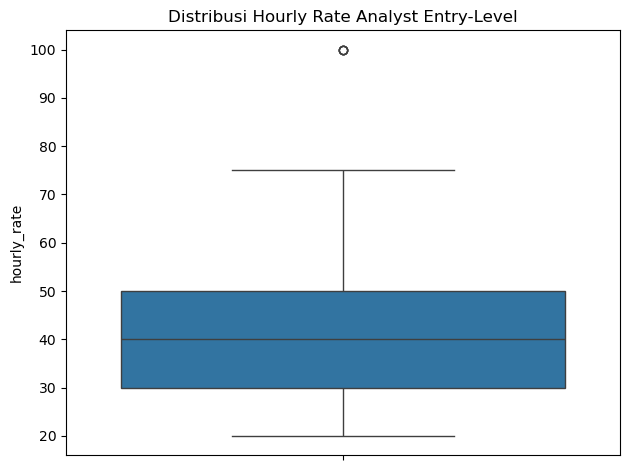

In [ ]:
# Visialization Boxplot of Hourly Rate 

sns.boxplot(y=freelancer['hourly_rate'])
plt.title('Box Hourly Rate Analyst Entry-Level')
#plt.xlabel('Hourly Rate')
#plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

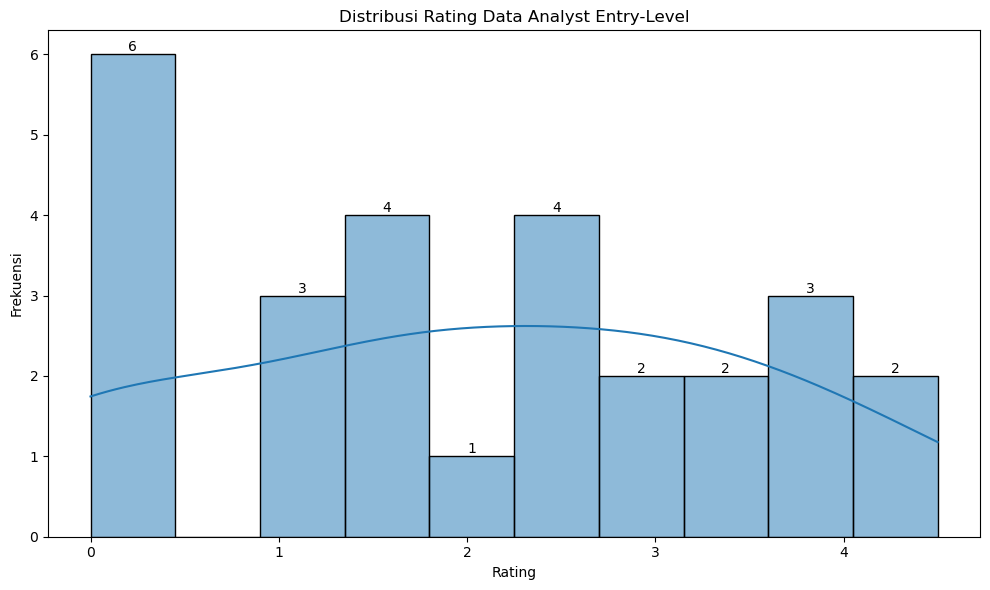

In [ ]:
# Visualization of Distribusi Rating Data Analyst Entry-Level

plt.figure(figsize=(10, 6))
rt=sns.histplot(freelancer['rating'], bins=10, kde=True)
plt.title('Distribusi Rating Data Analyst Entry-Level')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

In [ ]:
#Filter The most Freelancer's country based on Criteria
coutntry = freelancer['country'].value_counts().head(5)
coutntry

country
China           6
Japan           3
Egypt           3
Mexico          2
South Africa    2
Name: count, dtype: int64

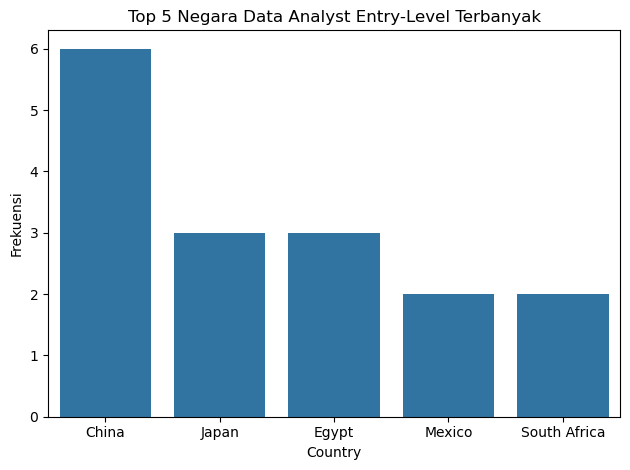

In [ ]:
#Visualization of Top 5 country for entry-level Data Analyst

sns.barplot(coutntry)
plt.title('Top 5 Negara Data Analyst Entry-Level Terbanyak')
plt.xlabel('Country')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

In [ ]:
#Filter The most Freelancer's langueges based on Criteria

language = freelancer['language'].value_counts().head(5)
language

language
Mandarin    6
Japanese    3
Spanish     3
Arabic      3
English     3
Name: count, dtype: int64

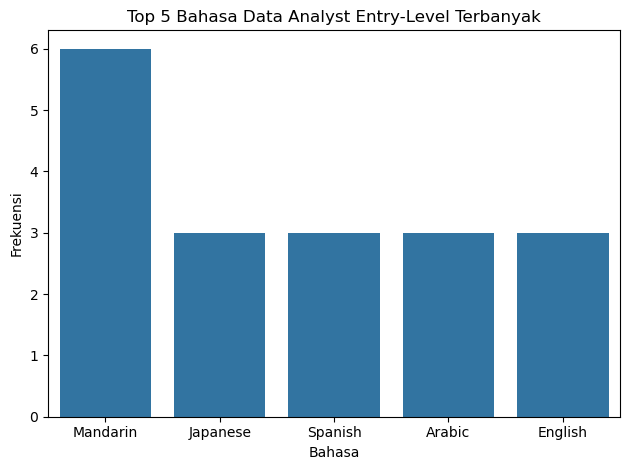

In [ ]:
#Visualization of Top 5 langueges for entry-level Data Analyst

sns.barplot(language)
plt.title('Top 5 Bahasa Data Analyst Entry-Level Terbanyak')
plt.xlabel('Bahasa')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

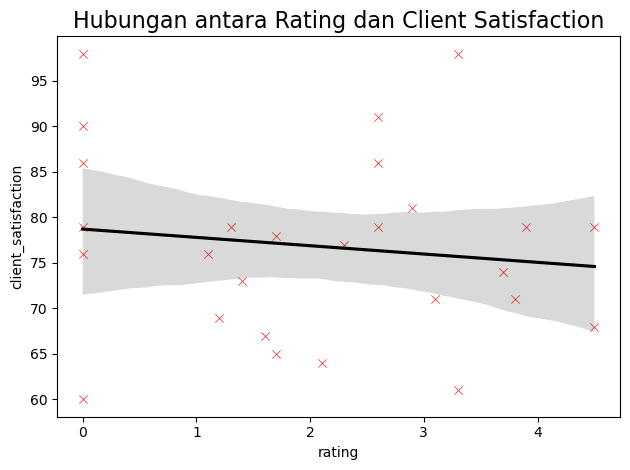

In [ ]:
#Correlation between Rating and Client Satisfaction

sns.scatterplot(x=freelancer['rating'], y=freelancer['client_satisfaction'], color='red',alpha=0.9, marker='x')
sns.regplot(x=freelancer['rating'], y=freelancer['client_satisfaction'], color='black',scatter=False)
plt.title('Hubungan antara Rating dan Client Satisfaction', fontsize=16)
plt.tight_layout()
plt.show()

Berdasarkan analisis di atas, negara mana yang sebaiknya menjadi fokus perekrutan untuk mendapatkan Data Analyst entry-level dengan hourly rate yang kompetitif?

In [ ]:
#display country with competitive hourly rate

country = freelancer.groupby('country').agg({
    'hourly_rate': ['mean', 'median', 'count'],
    'freelancer_id': 'count'
}).round(2)

country_sort = country.sort_values(
    by=('hourly_rate','mean'),
    ascending=True)


In [102]:
country_sort.head(5)

hourly_rate              freelancer_id
               mean median count         count
country                                       
Russia        20.00   20.0     1             1
Egypt         26.67   30.0     3             3
Mexico        30.00   30.0     2             2
Canada        40.00   40.0     1             1
China         44.17   40.0     6             6

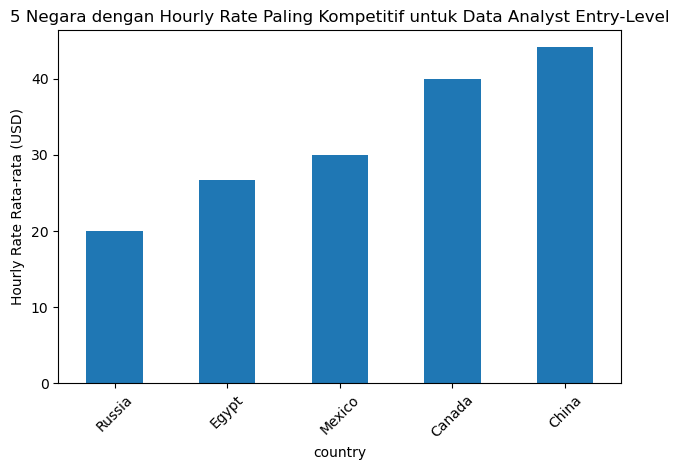

In [ ]:
# Top 5 Cuntry with competitive hourly rate

country_sort.head(5)['hourly_rate','mean'].plot(kind='bar')
plt.title('5 Negara dengan Hourly Rate Paling Kompetitif untuk Data Analyst Entry-Level')
plt.ylabel('Hourly Rate Rata-rata (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Adakah kandidat potensial yang langsung bisa Anda rekomendasikan kepada saya berdasarkan kombinasi faktor rating yang baik, hourly_rate yang wajar, dan client_satisfaction yang tinggi? (Sebutkan max 5 beserta freelancer_ID-nya).

In [ ]:
# Normalisasi setiap metrik ke skala 0-1
freelancer['rating_norm'] = freelancer['rating'] / 5
freelancer['satisfaction_norm'] = freelancer['client_satisfaction'] / 100
freelancer['rate_norm'] = 1 - (freelancer['hourly_rate'] / freelancer['hourly_rate'].max())

C:\Users\FITRAH\AppData\Local\Temp\ipykernel_11080\254318242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freelancer['rating_norm'] = freelancer['rating'] / 5
C:\Users\FITRAH\AppData\Local\Temp\ipykernel_11080\254318242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freelancer['satisfaction_norm'] = freelancer['client_satisfaction'] / 100
C:\Users\FITRAH\AppData\Local\Temp\ipykernel_11080\254318242.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


Bobot bisa disesuaikan (40% rating, 30% kepuasan client, 30% rate kompetitif)

In [107]:
#Buat composite score dengan bobot
# Anda bisa menyesuaikan bobot sesuai prioritas client
freelancer['composite_score'] = (
    0.4 * freelancer['rating_norm'] + 
    0.3 * freelancer['satisfaction_norm'] + 
    0.3 * freelancer['rate_norm']
)

C:\Users\FITRAH\AppData\Local\Temp\ipykernel_11080\2981900788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freelancer['composite_score'] = (


In [ ]:
# Display top 5 potential candidate for recomendation

Candidate = freelancer.sort_values('composite_score',ascending=True)
Candidate[['freelancer_id','name','country','hourly_rate','rating','client_satisfaction','composite_score']].head(5)

,freelancer_id,name,country,hourly_rate,rating,client_satisfaction,composite_score
719,FL250720,David Cherry,Japan,100.0,0.0,79.0,0.237
625,FL250626,Laura Butler,Australia,100.0,0.0,86.0,0.258
296,FL250297,Mark Thompson,South Africa,100.0,1.4,73.0,0.331
337,FL250338,Lori Miller,Turkey,40.0,0.0,60.0,0.360
305,FL250306,Ashley Salazar,China,75.0,1.6,67.0,0.404


In [120]:
freelancer.to_csv('clean_freelancers.csv', index=False)